In [41]:
from __future__ import print_function, unicode_literals, division
import pandas as pd
import tensorflow as tf
import urllib
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [11]:
a = tf.ones((2, 2))
b = tf.Variable(tf.zeros((2,2)), name='weights')
c = tf.add(a, b)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print (sess.run(b))
    print (c.eval())

[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]
 [ 1.  1.]]


In [26]:
a = tf.random_normal([10, 100], 0, 10)
sess = tf.Session()
sess.run(a)

In [33]:
tf.reset_default_graph()

with tf.name_scope('scope1'):
    v1 = tf.get_variable('var1', [1], dtype=tf.float32)
    v2 = tf.Variable(1, name='var2', dtype = tf.float32)
    a = tf.add(v1, v2)
print (v1.name)
print(v2.name)
print (a.name)

var1:0
scope1/var2:0
scope1/Add:0


In [34]:
tf.reset_default_graph()

with tf.variable_scope('scope2'):
    v1 = tf.get_variable('var1', [1], dtype=tf.float32)
    v2 = tf.Variable(1, name='var2', dtype = tf.float32)
    a = tf.add(v1, v2)
print (v1.name)
print(v2.name)
print (a.name)

scope2/var1:0
scope2/var2:0
scope2/Add:0


In [42]:
boston = pd.read_csv('boston.csv')
print (boston.dtypes)
boston.head()

CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [44]:
def read_dataset(path_to_file):
    return genfromtxt(path_to_file, delimiter=delimiter, skip_header= True)

def read_boston_data():
    data = read_dataset(path_to_file)
    features = data[:, :-1]
    prices = data[:, -1]
    return features, prices
path_to_file='boston.csv'
delimiter= ','
features, prices = read_boston_data()

In [56]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset-mu)/sigma
normalized_features = feature_normalize(features)

In [60]:
def append_bias_reshape(features, prices):
    n_samples, n_dim = features.shape
    expanded_features = np.c_[np.ones(n_samples), features]
    return expanded_features, prices.reshape(n_samples, 1)
f, p = append_bias_reshape(normalized_features, prices)

In [65]:
random_indices = np.random.rand(len(f)) < 0.8
x_train = f[random_indices]
y_train = p[random_indices]
x_test = f[~random_indices]
y_test = p[~random_indices]

In [70]:
n_dim = f.shape[1]
learning_rate = 0.01
training_epochs= 1000
display_step = 50
cost_history = np.empty(shape=[1], dtype=float)
seed = 2017

x = tf.placeholder(tf.float32, shape=[None, n_dim])
y = tf.placeholder(tf.float32, shape= [None, 1])

In [76]:
w = tf.Variable(tf.random_normal([n_dim,1], seed= seed), name='weight')
y_ = tf.matmul(x,w)
cost = tf.reduce_mean(tf.square(y_ - y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [90]:
with tf.Session() as sess:
    cost_history = []
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs):
        _, loss = sess.run([training_step,cost], feed_dict={x:x_train, y:y_train})
        cost_history.append(loss)

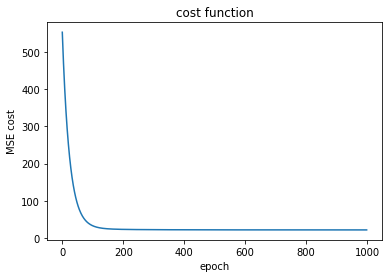

In [91]:
%matplotlib inline
plt.title('cost function')
plt.xlabel('epoch')
plt.ylabel('MSE cost')
plt.plot(cost_history)

In [129]:
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
learning_rate = 0.01
epochs = 20
batch_size = 100
nb_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
cost_history = list()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [133]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
w = tf.Variable(tf.truncated_normal([784, 10]))
b = tf.Variable(tf.truncated_normal([10]))
y = tf.matmul(x, w) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y_, 1), tf.arg_max(y, 1)), tf.float32))

In [136]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in range(epochs):
        for n_batch in range(1, nb_batch+1):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            feed = {x: x_batch, y_: y_batch}
            _, loss = sess.run([train_step, cost], feed_dict=feed)
            cost_history.append(loss)
            if (epoch +1) % display_step == 0:
                print("epoch: {}, n_batch: {}, loss: {}".format(epoch+1, n_batch+1, loss))
            acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            print("epoch: {}, accuracy: {}".format(epoch, acc))

epoch: 1, n_batch: 2, loss: 14.2836122513
epoch: 0, accuracy: 0.0882000029087
epoch: 1, n_batch: 3, loss: 13.2560472488
epoch: 0, accuracy: 0.0927999988198
epoch: 1, n_batch: 4, loss: 11.8427553177
epoch: 0, accuracy: 0.0954999998212
epoch: 1, n_batch: 5, loss: 11.2618627548
epoch: 0, accuracy: 0.101000003517
epoch: 1, n_batch: 6, loss: 8.90920734406
epoch: 0, accuracy: 0.106700003147
epoch: 1, n_batch: 7, loss: 9.35486602783
epoch: 0, accuracy: 0.111699998379
epoch: 1, n_batch: 8, loss: 9.08012008667
epoch: 0, accuracy: 0.119099996984
epoch: 1, n_batch: 9, loss: 9.88433551788
epoch: 0, accuracy: 0.12729999423
epoch: 1, n_batch: 10, loss: 9.21608924866
epoch: 0, accuracy: 0.134200006723
epoch: 1, n_batch: 11, loss: 8.43807888031
epoch: 0, accuracy: 0.144899994135
epoch: 1, n_batch: 12, loss: 7.05685138702
epoch: 0, accuracy: 0.155599996448
epoch: 1, n_batch: 13, loss: 7.84215688705
epoch: 0, accuracy: 0.168899998069
epoch: 1, n_batch: 14, loss: 6.81512308121
epoch: 0, accuracy: 0.18580

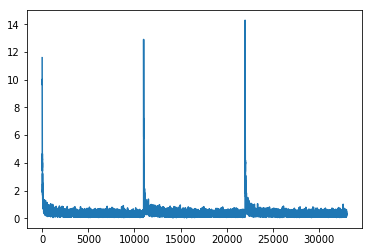

In [182]:
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
learning_rate = 0.01
epochs = 200
batch_size = 100
nb_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
cost_history = list()
n_hidden_1= 256
n_hidden_2= 64
n_input_dim = 784
n_class = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [165]:
'''
weights = {
    'h1':tf.Variable(tf.random_normal([n_input_dim, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3':tf.Variable(tf.random_normal([n_hidden_2, n_class]))
}

bias = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'b3':tf.Variable(tf.random_normal([n_class]))
}
'''

In [183]:
xavier = tf.contrib.layers.xavier_initializer(uniform=True)

with tf.name_scope('weights'):
    xa_weights = {
        'h1': tf.get_variable('h1', shape=[n_input_dim, n_hidden_1], initializer=xavier),
        'h2': tf.get_variable('h2', shape=[n_hidden_1, n_hidden_2], initializer=xavier),
        'h3': tf.get_variable('h3', shape=[n_hidden_2, n_class], initializer=xavier)
    }
    bias = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'b3':tf.Variable(tf.random_normal([n_class]))
}

In [184]:
def multilayer_perception(x, weights, bias):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), bias['b1'])
    layer_1 = tf.nn.relu(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), bias['b3'])
    return layer_3

In [186]:
x= tf.placeholder(tf.float32, [None, n_input_dim])
y_ = tf.placeholder(tf.float32, [None, n_class])

y= multilayer_perception(x, xa_weights, bias)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [187]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [188]:
for epoch in range(epochs):
    avg_cost= 0.
    for _ in range(nb_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train_step, cost], feed_dict={x: batch_xs, y_: batch_ys})
        avg_cost += c/nb_batch
    cost_history.append(loss)
    if (epoch +1) % display_step == 0:
        print("epoch: {:04d}, cost: {:.9f}".format(epoch+1, avg_cost))
print ('finished optimization')

epoch: 0001, cost: 0.261269611
epoch: 0002, cost: 0.131064563
epoch: 0003, cost: 0.099283687
epoch: 0004, cost: 0.091663022
epoch: 0005, cost: 0.085422072
epoch: 0006, cost: 0.076230219
epoch: 0007, cost: 0.068619659
epoch: 0008, cost: 0.075965702
epoch: 0009, cost: 0.069853800
epoch: 0010, cost: 0.060626527
epoch: 0011, cost: 0.056529067
epoch: 0012, cost: 0.061982288
epoch: 0013, cost: 0.060081377
epoch: 0014, cost: 0.055181968
epoch: 0015, cost: 0.047390925
epoch: 0016, cost: 0.048352332
epoch: 0017, cost: 0.050431851
epoch: 0018, cost: 0.051015512
epoch: 0019, cost: 0.054100743
epoch: 0020, cost: 0.037766699
epoch: 0021, cost: 0.048457793
epoch: 0022, cost: 0.048414546
epoch: 0023, cost: 0.045538943
epoch: 0024, cost: 0.038419227
epoch: 0025, cost: 0.038958618
epoch: 0026, cost: 0.043442605
epoch: 0027, cost: 0.036604701
epoch: 0028, cost: 0.042825186
epoch: 0029, cost: 0.033478645
epoch: 0030, cost: 0.042109883
epoch: 0031, cost: 0.044785610
epoch: 0032, cost: 0.041430926
epoch: 0

In [189]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print (sess.run(accuracy, feed_dict = {x:mnist.test.images,
                                       y_:mnist.test.labels
}))

0.9724


In [163]:
mnist = input_data.read_data_sets("MNIST/", one_hot=True)


# Model parameters
learning_rate = 0.01
epochs = 50
batch_size = 100
nb_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
n_hidden_1 = 256
n_hidden_2 = 64
n_input_dim = 784
n_class = 10


# Constructing graph input (input feature normalized)
x = tf.placeholder(tf.float32, [None, n_input_dim])  # MNIST input 28x28 -> 784
y = tf.placeholder(tf.float32, [None, n_class])  # 10 digits -> 10 classes

# Xavier uniform initializer


# Create model
def multilayer_perceptron(x, weights, bias):
    # Hidden layer 1 - Relu activation
    layer_1 = tf.add(tf.matmul(x, weights['w1']), bias['b1'])
    layer_1 = tf.nn.relu(layer_1)
    tf.summary.histogram("relu1", layer_1)

    # Hidden layer 2 - Relu activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), bias['b2'])
    layer_2 = tf.nn.relu(layer_2)
    tf.summary.histogram("relu2", layer_2)

    # Output layer - Linear activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), bias['b3'])
    return layer_3


# tf tensorboard summary page
'''
with tf.name_scope('Weights'):
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input_dim, n_hidden_1]),
                          name='w1'),
        'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),
                          name='w2'),
        'w3': tf.Variable(tf.random_normal([n_hidden_2, n_class]),
                          name='w3')
    }

'''
xavier = tf.contrib.layers.xavier_initializer(uniform=True)

with tf.name_scope('Weights'):
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input_dim, n_hidden_1]),
                          initializer=xavier),
        'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),
                          initializer=xavier),
        'w3': tf.Variable(tf.random_normal([n_hidden_2, n_class]),
                          initializer=xavier)
    }


with tf.name_scope('Bias'):
    bias = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1]),
                          name='b1'),
        'b2': tf.Variable(tf.random_normal([n_hidden_2]),
                          name='b2'),
        'b3': tf.Variable(tf.random_normal([n_class]),
                          name='b3')
    }

with tf.name_scope('Model'):
    # Build model
    pred = multilayer_perceptron(x, weights, bias)

with tf.name_scope('Loss'):
    # Softmax Cross entropy (cost function)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,
                                                                  labels=y))

with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    grads = tf.gradients(loss, tf.trainable_variables())
    grads = list(zip(grads, tf.trainable_variables()))
    apply_grads = optimizer.apply_gradients(grads_and_vars=grads)

with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))


# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)
# Create summaries to visualize weights
for var in tf.trainable_variables():
    tf.summary.histogram(var.name, var)
# Merge all summaries into a single op
merged_summary = tf.summary.merge_all()


# Create session
sess = tf.InteractiveSession()

# Initialize the variables
tf.global_variables_initializer().run()

# op to write logs to Tensorboard
summary_writer = tf.summary.FileWriter(logs_path,graph=tf.get_default_graph())
       

KeyboardInterrupt: 

In [ ]:
# Start training
for epoch in range(epochs):
    avg_cost = 0.
    for i in range(nb_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c, summary = sess.run([apply_grads, loss, merged_summary],
                        feed_dict={x: batch_xs, y: batch_ys})
        # Write logs at every iteration
        summary_writer.add_summary(summary, epoch * nb_batch + i)
        avg_cost += c/nb_batch
    # display log
    if (epoch+1) % display_step == 0:
        print("Epoch: {:04d}   Cost= {:.9f}".format(epoch+1, avg_cost))

print ('Finished Optimization!')